**Classify the Images using Tensorflow**

Dataset: ***Fashion MNIST Dataset*** -> Classify images of clothing like shirt, pants and sneakers.

Dataset contains 60000 Training Images and 10000 test Images, 10 Classes, Image Size = 28 x 28 pixels, Label Ids = 0 to 9, Pixel value = 0 to 255.

In [ ]:
# Install Tensorflow 2.1.0 in cloud environment
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 21kB/s 
     |████████████████████████████████| 450kB 48.4MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 3.9MB 51.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=0fe5fc11ce10668660d45605fb78a5103ec0a54ecd6da98516d33d4f81728aaa
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [ ]:
# Import the necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [ ]:
# Get the Fashion MNIST dataset from Keras package - Obtain the Training set and Test Set
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [ ]:
# Initialize the class names
class_names=['T-shirt/Top', 'Trouser', 'Fullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle Boot']

In [ ]:
# Check the dimension of Training and Test Data
print(train_images.shape)
print(len(train_labels))
print((train_labels))

print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


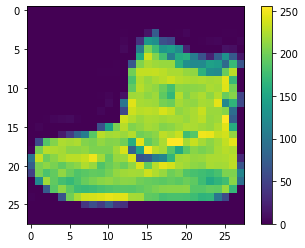

In [ ]:
# Plot the first figure in the Train data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalize the Train and Test Images
train_images=train_images/255.0
test_images=test_images/255.0

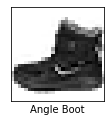

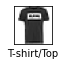

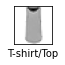

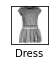

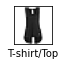

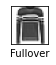

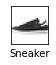

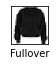

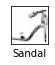

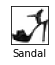

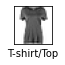

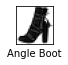

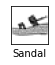

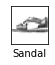

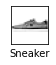

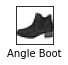

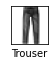

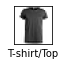

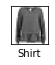

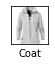

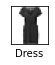

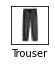

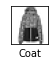

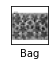

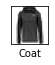

In [ ]:
# Plot the sample Train Images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()

In [ ]:
# Initialize the model with 1 Hidden layer (No of Neurons = 128)
# Check the number of parameters in the model
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)), 
                        keras.layers.Dense(128, activation='relu'), 
                        keras.layers.Dense(10, activation='softmax')
                        ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set the parameters for the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model for 10 epochs
# If batch_size = 32, then the No of Batches = 60000/32 =1875 
model.fit(train_images, train_labels, epochs=10, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4994 - accuracy: 0.8236
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3766 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3386 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3122 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2962 - accuracy: 0.8901
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2829 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2695 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2598 - accuracy: 0.9025
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2504 - accuracy: 0.9074
Epoch 10/10
60

In [ ]:
# Evaluate the model and obtain the accuracy and loss
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('\n Test accuracy:', test_acc)
print('\n Test loss:', test_loss)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3360 - accuracy: 0.8821

 Test accuracy: 0.8821

 Test loss: 0.3359793998003006


In [ ]:
# Make predictions on Test Images
# Look at the probality score obtained on predicting the Test_image[0]
prediction=model.predict(test_images)
print(prediction[0])

print('\n Predicted value: ', np.argmax(prediction[0]))
print('\n Groundtruth value: ', test_labels[0])

[3.3925934e-07 4.4044551e-10 3.8234271e-07 1.0369648e-08 6.3737998e-10
 4.0967492e-04 4.3469068e-08 1.5833015e-02 7.8381078e-08 9.8375642e-01]

 Predicted value:  9

 Groundtruth value:  9


In [ ]:
# Function to plot Images
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("({}), {:2.0f}%, ({})".format(class_names[predicted_label], 100 * np.max(predictions_array), class_names[true_label], color=color))

In [ ]:
# Function to plot the probability scores for each image
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

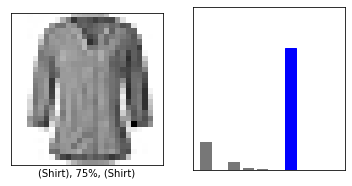

In [ ]:
# Take any one Test Image and make predicted values
i=4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)
plt.show()

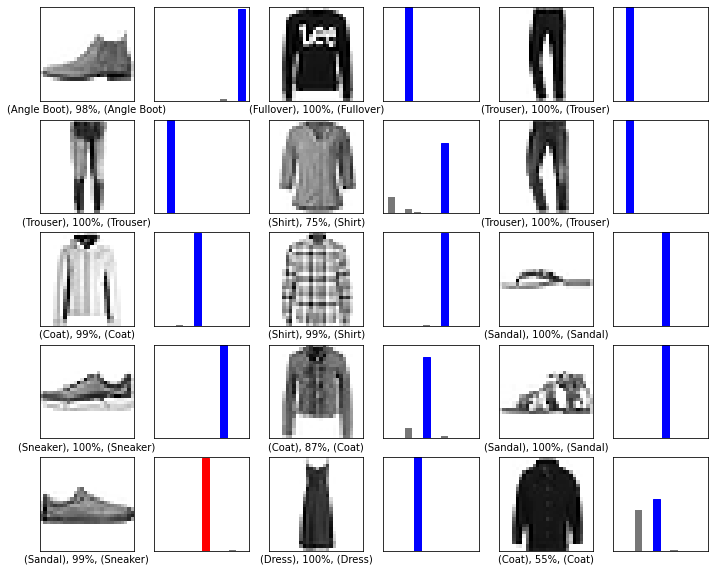

In [ ]:
# Visualize the 15 Images with the prediction probability scores
num_rows=5
num_cols=3
num_images = num_rows * num_cols
plt.figure(figsize= (2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, prediction, test_labels)

plt.show()